### 목표 : 생선 품종 분류 모델

-   데이터 : 2가지 품종의 생선 데이터 fish.csv
-   피쳐 : Weight, Length
-   타겟 : Species
-   유형 : 지도학습/분류


(1) 모듈 로딩 & 데이터 준비


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [31]:
data_file = "../data/fish.csv"


In [32]:
fishDF = pd.read_csv(data_file, usecols=[0, 1, 2])
fishDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [33]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(["Bream", "Smelt"])

# 해당 행만 도출
twoFishDF = fishDF[mask]
twoFishDF.info()

twoFishDF.reset_index(drop=True, inplace=True)
twoFishDF


<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [34]:
# 품종 행을 수치화
# twoFishDF.Species = twoFishDF.Species.replace({"Bream": 0, "Smelt": 1})
twoFishDF.loc[:, "Species"] = twoFishDF["Species"].replace({"Bream": 0, "Smelt": 1})
twoFishDF.head()


,Species,Weight,Length
0,0,242.0,25.4
1,0,290.0,26.3
2,0,340.0,26.5
3,0,363.0,29.0
4,0,430.0,29.0


In [55]:
twoFishDF["Species"] = twoFishDF["Species"].astype("int8").copy()


In [56]:
twoFishDF["Species"].dtype


dtype('int8')

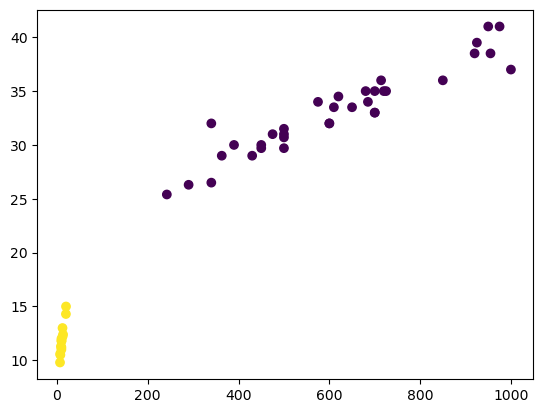

In [37]:
plt.scatter(x=twoFishDF.Weight, y=twoFishDF.Length, c=twoFishDF.Species)


(3) 기계학습을 위한 데이터 준비

-   피쳐/특성 + 타겟/라벨/클래스
-   학습용 데이터셋 : 75%
-   테스트용 데이터셋 : 25%


(3-1) 직접 타겟/라벨 컬럼의 비율을 고려해서 학습&테스트용 데이터셋 준비


In [38]:
# 데이터 섞기 => 100% 모두 섞기
twoFishDF = twoFishDF.sample(frac=1)

print(twoFishDF.shape)
twoFishDF


(49, 3)


,Species,Weight,Length
5,0,450.0,29.7
47,1,19.7,14.3
41,1,10.0,11.8
36,1,7.5,10.5
20,0,575.0,34.0
27,0,714.0,36.0
14,0,600.0,32.0
24,0,700.0,35.0
3,0,363.0,29.0
0,0,242.0,25.4


In [39]:
# 학습과 테스트 비율 조절 갯수 계산
num = round(twoFishDF.shape[0] * 0.8)

# 학습 데이터셋 추출
trainDF = twoFishDF.iloc[: num + 1]
print(f"trainDF => {trainDF.shape}\n{trainDF.tail(3)}")

# 테스트 데이터셋 추출
testDF = twoFishDF.iloc[num + 1 :]
print(f"\ntestDF => {testDF.shape}\n{testDF.tail(3)}")


trainDF => (40, 3)
    Species  Weight  Length
16        0   700.0    33.0
31        0   955.0    38.5
40        1     8.7    11.3

testDF => (9, 3)
    Species  Weight  Length
39        1     9.8    11.2
7         0   390.0    30.0
19        0   650.0    33.5


In [40]:
featureDF = twoFishDF[twoFishDF.columns[1:]]
targetDF = twoFishDF.Species

print(f"featureDF => {featureDF.shape}\n{featureDF.head(2)}")
print(f"targetDF => {targetDF.shape}\n{targetDF.head(2)}")


featureDF => (49, 2)
    Weight  Length
5    450.0    29.7
47    19.7    14.3
targetDF => (49,)
5     0
47    1
Name: Species, dtype: int8


(3-2) scikit-learn 모듈 활용한 학습&테스트용 데이터셋 준비

-   추가 모듈 로딩


In [41]:
from sklearn.model_selection import train_test_split


In [42]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [기본] shuffle = True, train:test = 0.75:0.25
## -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF)


In [43]:
print(f"x_train : {x_train.shape}, y_train : {y_train.shape}")
# print(x_train.head(2), y_train.head(2), sep="\n")

print(f"x_test : {x_test.shape}, y_test : {y_test.shape}")
# print(x_test.head(2), y_test.head(2), sep="\n")

# 타겟/클래스 비율
print(f"{y_train.value_counts() / y_train.shape[0]}")
print(f"{y_test.value_counts() / y_test.shape[0]}")


x_train : (36, 2), y_train : (36,)
x_test : (13, 2), y_test : (13,)
Species
0    0.722222
1    0.277778
Name: count, dtype: float64
Species
0    0.692308
1    0.307692
Name: count, dtype: float64


In [44]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [기본] shuffle = True
## -- [설정] train:test = 0.9:0.1 => test_size, train_size 매개변수 값 설정
## -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.1)


In [45]:
print(f"x_train : {x_train.shape}, y_train : {y_train.shape}")
print(x_train.head(2), y_train.head(2), sep="\n")

print(f"x_test : {x_test.shape}, y_test : {y_test.shape}")
print(x_test.head(2), y_test.head(2), sep="\n")

# 타겟/클래스 비율
print(f"{y_train.value_counts() / y_train.shape[0]}")
print(f"{y_test.value_counts() / y_test.shape[0]}")


x_train : (44, 2), y_train : (44,)
    Weight  Length
48    19.9    15.0
38     9.7    11.0
48    1
38    1
Name: Species, dtype: int8
x_test : (5, 2), y_test : (5,)
    Weight  Length
1    290.0    26.3
47    19.7    14.3
1     0
47    1
Name: Species, dtype: int8
Species
0    0.727273
1    0.272727
Name: count, dtype: float64
Species
0    0.6
1    0.4
Name: count, dtype: float64


In [69]:
## -- 비율 설정 학습/테스트셋 분리
## -- [기본] shuffle = True
## -- [설정] train:test = 0.9:0.1 => test_size, train_size 매개변수 값 설정
## --        분류할 target이 불균형일 경우 비율 지정하는 stratify 매개변수를 target으로 설정
## -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
x_train, x_test, y_train, y_test = train_test_split(
    featureDF, targetDF, test_size=0.1, stratify=targetDF, random_state=10
)


In [70]:
print(f"x_train : {x_train.shape}, y_train : {y_train.shape}")
print(x_train.head(2), y_train.head(2), sep="\n")

print(f"x_test : {x_test.shape}, y_test : {y_test.shape}")
print(x_test.head(2), y_test.head(2), sep="\n")

# 타겟/클래스 비율
print(f"{y_train.value_counts() / y_train.shape[0]}")
print(f"{y_test.value_counts() / y_test.shape[0]}")


x_train : (44, 2), y_train : (44,)
    Weight  Length
30   920.0    38.5
15   600.0    32.0
30    0
15    0
Name: Species, dtype: int8
x_test : (5, 2), y_test : (5,)
    Weight  Length
17   700.0    33.0
40     8.7    11.3
17    0
40    1
Name: Species, dtype: int8
Species
0    0.704545
1    0.295455
Name: count, dtype: float64
Species
0    0.8
1    0.2
Name: count, dtype: float64


In [71]:
### 검증용 데이터셋 준비 - 학습용 데이터셋에서 분리
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, stratify=y_train, random_state=10
)


In [72]:
print(f"x_train : {x_train.shape}, y_train : {y_train.shape}")
# print(x_train.head(2), y_train.head(2), sep="\n")

print(f"x_val : {x_val.shape}, y_val : {y_val.shape}")
# print(x_val.head(2), y_val.head(2), sep="\n")

print(f"x_test : {x_test.shape}, y_test : {y_test.shape}")
# print(x_test.head(2), y_test.head(2), sep="\n")

# 타겟/클래스 비율
print(f"{y_train.value_counts() / y_train.shape[0]}")
print(f"{y_test.value_counts() / y_test.shape[0]}")


x_train : (39, 2), y_train : (39,)
x_val : (5, 2), y_val : (5,)
x_test : (5, 2), y_test : (5,)
Species
0    0.692308
1    0.307692
Name: count, dtype: float64
Species
0    0.8
1    0.2
Name: count, dtype: float64


(4) 학습 진행

-   학습 방법 : 지도학습/분류 => KNN
-   모델 인스턴스 생성 => fit()


In [73]:
model = KNeighborsClassifier()
model


KNeighborsClassifier()

In [74]:
# 학습 진행 => 학습용 데이터 진행
model.fit(x_train, y_train)


KNeighborsClassifier()

(5) 테스트 진행 = 학습에 사용되지 않는 데이터로 진행


In [75]:
model.score(x_val, y_val)


1.0

(6) 모델 활용 예측 => 새로운 데이터로 진행


In [76]:
model.predict(x_test)


array([0, 1, 0, 0, 0], dtype=int8)

In [77]:
y_test


17    0
40    1
6     0
5     0
28    0
Name: Species, dtype: int8

(6-1) 사용자로부터 전달받은 새로운 데이터에 대한 예측\
==> 학습할 때 전달되는 피쳐 형태와 동일한 데이터


In [78]:
## 길이 25, 무게 160인 생선의 품종 예측
new_data = pd.DataFrame([[160, 25]], columns=twoFishDF.columns[1:])
new_data


,Weight,Length
0,160,25


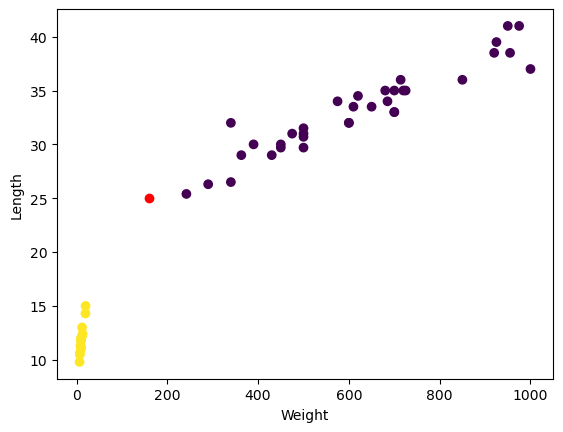

In [79]:
# 새로운 데이터와 학습 데이터의 시각화
plt.plot(new_data.Weight, new_data.Length, "ro")

# 학습 데이터 시각화
plt.scatter(twoFishDF.Weight, twoFishDF.Length, c=twoFishDF.Species)

plt.xlabel("Weight")
plt.ylabel("Length")
plt.show()


In [87]:
# 생성된 모델로 새로운 데이터 품종 예측
model.predict(new_data)


array([1], dtype=int8)

In [95]:
# 새로운 데이터의 최근접 데이터 추출
_, index = model.kneighbors(new_data)
index = index.tolist()[0]
index


[38, 30, 7, 34, 4]

In [96]:
twoFishDF.loc[index]


,Species,Weight,Length
38,1,9.7,11.0
30,0,920.0,38.5
7,0,390.0,30.0
34,0,950.0,41.0
4,0,430.0,29.0


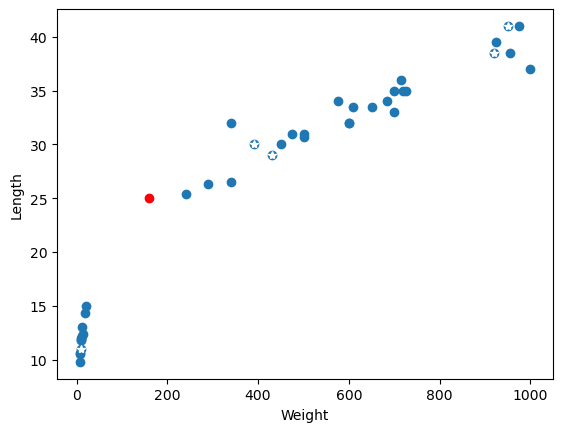

In [100]:
# 새로운 데이터와 학습 데이터의 시각화
plt.plot(new_data.Weight, new_data.Length, "ro")

# 학습 데이터 시각화
# plt.scatter(twoFishDF.Weight, twoFishDF.Length, c=twoFishDF.Species)
plt.scatter(x_train.Weight, x_train.Length)

plt.plot(twoFishDF.loc[index].Weight, twoFishDF.loc[index].Length, "w*")

plt.xlabel("Weight")
plt.ylabel("Length")
# plt.ylim(0, 1000)
plt.show()
